In [1]:
import os
import sys
import cv2

import numpy as np
import geopandas as gdp
import matplotlib.pyplot as plt

sys.path.insert(0, '../')
import processing.loaders

In [2]:
gdf = gdp.read_file(os.path.join('..', 'data', 'neighborhoods.geojson'))

pl = processing.loaders.PanoramaLoader(os.path.join('..', 'data', '15000-water-images'), 
                                       filter_corrupt=True)

pl.set_option('read_method', cv2.imread)
pl.set_option('show_method', plt.imshow)

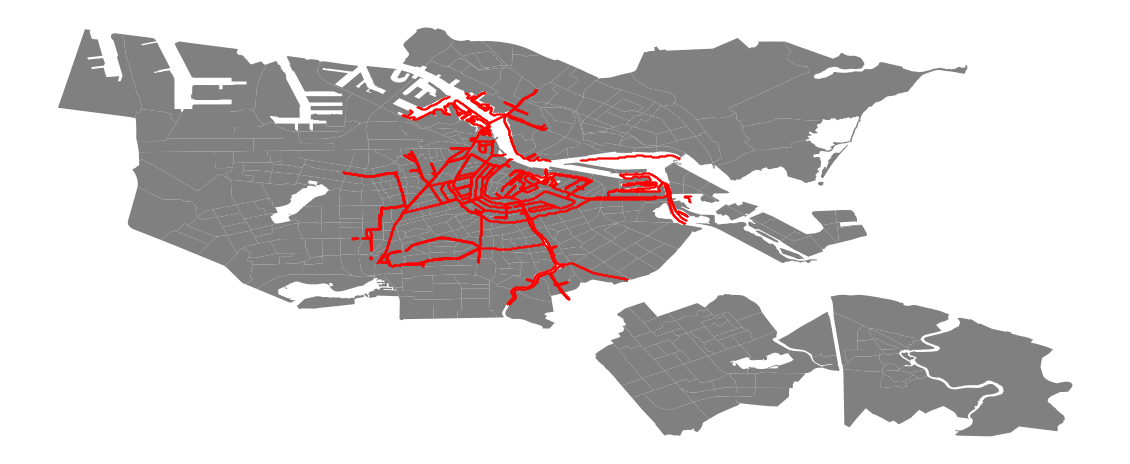

In [11]:
plt.rcParams["figure.figsize"] = (20,10)

ax = gdf.plot(color='gray')
coords = []

for _, row in pl.all_metadata.iterrows():
    coords.append([row.lng, row.lat])

coords = np.array(coords)
ax.scatter(coords[:, 0], coords[:, 1], color='r', s=.5)
plt.axis('off')
plt.show()